# "Human Learning" with iris data

Can you predict the species of an iris using petal and sepal measurements?

TASKS:
1. Read iris data into a pandas DataFrame, including column names.
2. Gather some basic information about the data.
3. Use groupby, sorting, and/or plotting to look for differences between species.
4. Come up with a set of rules that could be used to predict species based upon measurements.

BONUS: Define a function that accepts a row of data and returns a predicted species.
Then, use that function to make predictions for all existing rows of data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Task 1

In [2]:
# read the iris data into a pandas DataFrame, including column names
iris = pd.read_csv('iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Task 2

In [3]:
# gather basic information
# - shape
# - head
# - data types of the columns
# - describe
# - counts of the values in the column species
# - count the nulls

In [4]:
iris.shape

(150, 5)

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [9]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Task 3

In [16]:
# use groupby to look for differences between the species
iris.groupby("species").sepal_length.mean()

species
setosa        5.006
versicolor    5.936
virginica     6.588
Name: sepal_length, dtype: float64

In [17]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,species_num,petal_area
species,,,,,,
setosa,5.006,3.418,1.464,0.244,0.0,0.3628
versicolor,5.936,2.770,4.260,1.326,1.0,5.7204
virginica,6.588,2.974,5.552,2.026,2.0,11.2962


In [18]:
iris.groupby('species').describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... species_num      petal_area           \
                 count   mean  ...         75%  max      count     mean   
species                        ...                                        
setosa            50.0  3.418  ...         0.0  0.0       50.0   0.3628   
versicolor        50.0  2.770  ...         1.0  1.0       50.0   5.7204   
virginica         50.0  2.974  ...         2.0  2.0       50.0  11.2962   

                                                          
                 std   min     25%     50%    75%    max  
species                                                   
setosa      0.183248  0.11  0.2650   0.300   0.42   0.96  
versicolor  1.368403  3.30  4.8600   5.615   6.75   8.64  
virginica   2.157412  7.50  9.7175  11.445  12.79  15.87  

[3 rows x 48 columns]

In [19]:
# use sorting to look for differences between the species
iris.sort_values("sepal_length").values

array([[4.3, 3.0, 1.1, ..., 'setosa', 0, 0.11000000000000001],
       [4.4, 3.2, 1.3, ..., 'setosa', 0, 0.26],
       [4.4, 3.0, 1.3, ..., 'setosa', 0, 0.26],
       ...,
       [7.7, 3.8, 6.7, ..., 'virginica', 2, 14.740000000000002],
       [7.7, 3.0, 6.1, ..., 'virginica', 2, 14.029999999999998],
       [7.9, 3.8, 6.4, ..., 'virginica', 2, 12.8]], dtype=object)

In [23]:
iris.sort_values("sepal_width").values

array([[5.0, 2.0, 3.5, ..., 'versicolor', 1, 3.5],
       [6.0, 2.2, 4.0, ..., 'versicolor', 1, 4.0],
       [6.0, 2.2, 5.0, ..., 'virginica', 2, 7.5],
       ...,
       [5.2, 4.1, 1.5, ..., 'setosa', 0, 0.15000000000000002],
       [5.5, 4.2, 1.4, ..., 'setosa', 0, 0.27999999999999997],
       [5.7, 4.4, 1.5, ..., 'setosa', 0, 0.6000000000000001]],
      dtype=object)

array([[<AxesSubplot:title={'center':'setosa'}>,
        <AxesSubplot:title={'center':'versicolor'}>],
       [<AxesSubplot:title={'center':'virginica'}>, <AxesSubplot:>]],
      dtype=object)

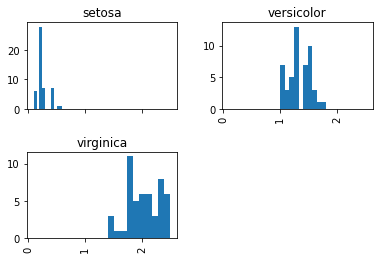

In [24]:
# use plotting to look for differences between the species
iris.petal_width.hist(by=iris.species, sharex=True)

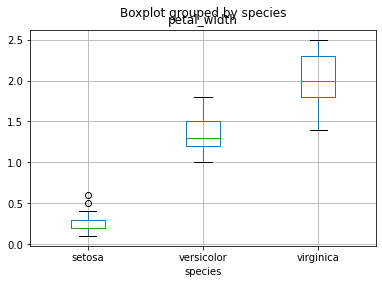

In [28]:
iris.boxplot(column='petal_width', by='species');

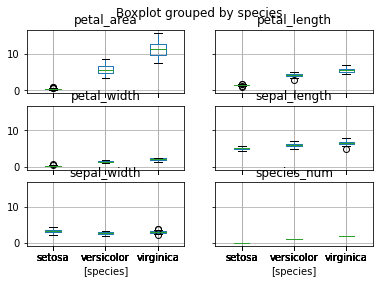

In [27]:
iris.boxplot(by='species');

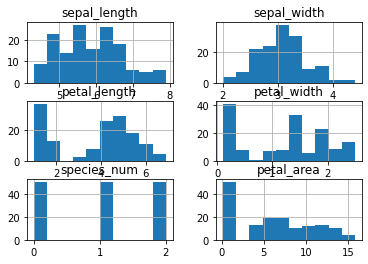

In [29]:
# map species to a numeric value so that plots can be colored by category
# iris['species_num'] = iris.species.map({'setosa':0, 'versicolor':1, 'virginica':2})
iris['species_num'] = iris.species.factorize()[0]
# iris.species_num
iris.hist();

## Task 4

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,petal_area
86,6.7,3.1,4.7,1.5,versicolor,1,7.05
85,6.0,3.4,4.5,1.6,versicolor,1,7.20
52,6.9,3.1,4.9,1.5,versicolor,1,7.35
72,6.3,2.5,4.9,1.5,versicolor,1,7.35
119,6.0,2.2,5.0,1.5,virginica,2,7.50
56,6.3,3.3,4.7,1.6,versicolor,1,7.52
106,4.9,2.5,4.5,1.7,virginica,2,7.65
133,6.3,2.8,5.1,1.5,virginica,2,7.65
134,6.1,2.6,5.6,1.4,virginica,2,7.84
83,6.0,2.7,5.1,1.6,versicolor,1,8.16


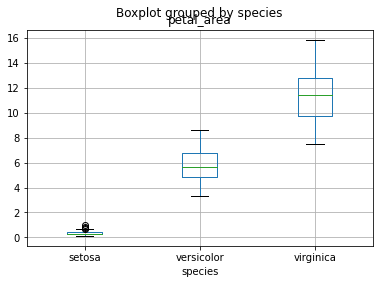

In [46]:
# Come up with a set of rules that could be used to predict species based upon measurements.
iris["petal_area"] = iris.petal_length * iris.petal_width
iris.groupby("species").petal_area.describe().unstack()
iris.boxplot(column="petal_area", by="species")
iris[(iris.petal_area > 7) & (iris.petal_area < 9)].sort_values('petal_area')

## Bonus

In [49]:
# define function that accepts a row of data and returns a predicted species
def classify_iris(row):
    petal_area = (row[2] * row[3]) #define petal area, petal_length * petal_width
    
    if petal_area < 2:
        prediction = "setosa"
    elif petal_area < 7.5: 
        prediction = "versicolor"
    else: 
        prediction = "virginica"
        
    factorize = {'setosa':0, 'versicolor':1, 'virginica':2}    #need to map the strings back to their factors
    return factorize[prediction]

In [55]:
predictions = [classify_iris(row) for index, row in iris.iterrows()] # store predictions for all rows

In [70]:
predictions

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

In [71]:
np.mean(iris.species_num == predictions) # calculate the percentage of correct predictions

0.9733333333333334

In [72]:
sum(iris.species_num == predictions) / len(predictions) # calculate the percentage of correct predictions

0.9733333333333334